In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('real_estate_dataset.csv')
data = data.drop(['ID'], axis=1)
X = data.drop(['Price'], axis=1)
y = data['Price']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y = y / y.mean()
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y.values, test_size=0.2, random_state=42)

In [3]:
# регрессия
def regression(X, y, tau):
    X = np.column_stack([np.ones(X.shape[0]), X])
    U, s, Vt = np.linalg.svd(X, full_matrices=False)
    s_reg = s / (s**2 + tau)
    coef = Vt.T @ np.diag(s_reg) @ U.T @ y
    return coef

def predict(X, coef):
    X = np.column_stack([np.ones(X.shape[0]), X])
    y_pred = X @ coef
    return y_pred

In [4]:
# подбор параметра регуляризации
def find_tau(X_train, y_train, X_test, y_test, taus):
    best_tau = None
    best_quality = float('inf')
    qualities = []

    for tau in taus:
        coef = regression(X_train, y_train, tau)
        y_pred = predict(X_test, coef)

        quality = np.linalg.norm(y_pred - y_test)
        qualities.append(quality)
        if quality < best_quality:
            best_quality = quality
            best_tau = tau

    return best_tau, best_quality, qualities

In [5]:
taus = np.linspace(0.01, 5, 100)
start_time = datetime.datetime.now()
best_tau, best_quality, qualities = find_tau(X_train, y_train, X_test, y_test, taus)
end_time = datetime.datetime.now()
time_taken = end_time - start_time

In [6]:
print(f'Лучший параметр регуляризации: {best_tau}')
print(f'Качество: {best_quality}')
print(f'Время работы (вручную): {time_taken}')

Лучший параметр регуляризации: 1.8245454545454547
Качество: 0.3565094842375256
Время работы (вручную): 0:00:00.014985


[]

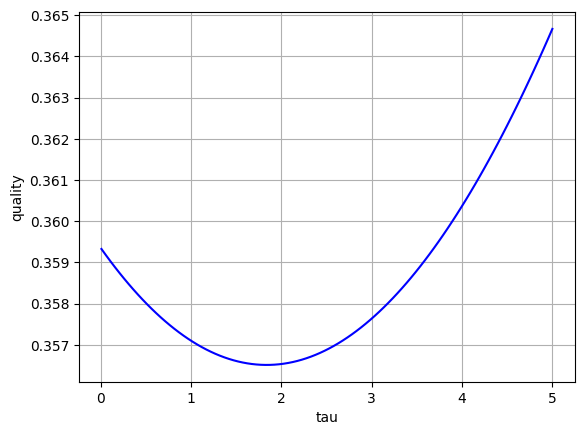

In [7]:
plt.plot(taus, qualities, color='b')
plt.xlabel('tau')
plt.ylabel('quality')
plt.grid()
plt.plot()

In [8]:
def find_tau_lib(X_train, y_train, X_test, y_test, taus):
    best_tau = None
    best_quality = float('inf')
    qualities = []

    for tau in taus:
        ridge = Ridge(alpha=tau, solver='svd')
        ridge.fit(X_train, y_train)
        y_pred = ridge.predict(X_test)

        quality = np.linalg.norm(y_pred - y_test)
        qualities.append(quality)
        if quality < best_quality:
            best_quality = quality
            best_tau = tau

    return best_tau, best_quality, qualities

In [9]:
taus = np.linspace(0.01, 5, 100)
start_time = datetime.datetime.now()
best_tau, best_quality, lib_qualities = find_tau_lib(X_train, y_train, X_test, y_test, taus)
end_time = datetime.datetime.now()
time_taken = end_time - start_time

In [10]:
print(f'Лучший параметр регуляризации: {best_tau}')
print(f'Качество: {best_quality}')
print(f'Время работы (библиотека): {time_taken}')

Лучший параметр регуляризации: 0.01
Качество: 0.3593706105245881
Время работы (библиотека): 0:00:00.081993


[]

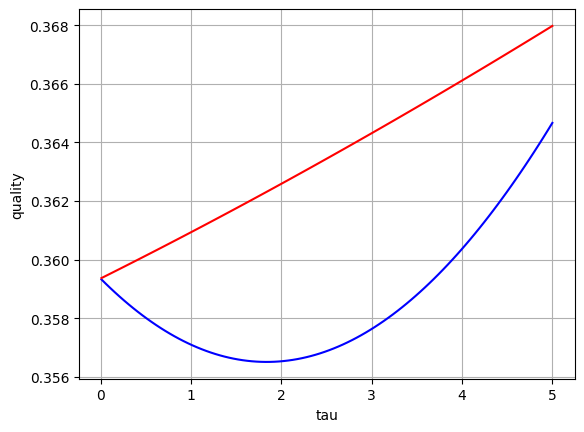

In [11]:
plt.plot(taus, qualities, color='b')
plt.plot(taus, lib_qualities, color='r')

plt.xlabel('tau')
plt.ylabel('quality')
plt.grid()
plt.plot()